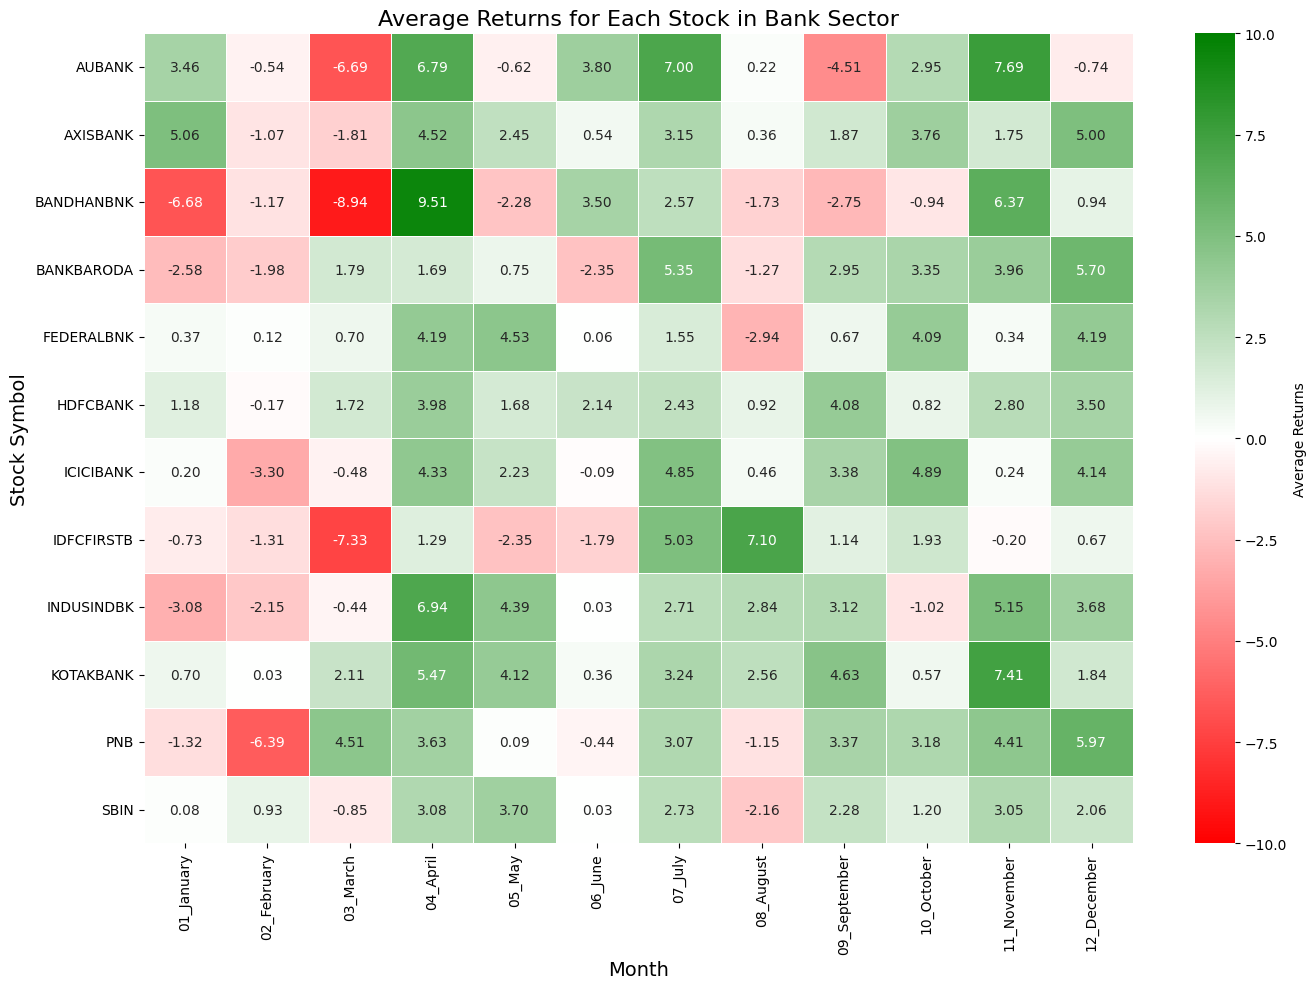

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from matplotlib.colors import LinearSegmentedColormap

# Custom colormap
cmap = LinearSegmentedColormap.from_list('rg', ["r", "w", "g"], N=256) 

# Path to the directory containing the monthly folders
base_dir = 'bank data'

# Initialize a list to store the dataframes
df_list = []

# Iterate over each month's folder
for month in os.listdir(base_dir):
    month_dir = os.path.join(base_dir, month)
    
    # Check if the current path is a directory
    if os.path.isdir(month_dir):
        # Read all CSV files in the current month's folder
        for file in glob.glob(os.path.join(month_dir, '*.csv')):
            df = pd.read_csv(file)
            df['Month'] = month  # Add the month as a column
            df_list.append(df)

# Combine all dataframes into a single dataframe
data = pd.concat(df_list, ignore_index=True)

# Pivot the data to have months as columns and stock symbols as rows
pivot_data = data.pivot(index='Symbol', columns='Month', values='Average Returns')

# Set up the plot
plt.figure(figsize=(14, 10))

# Define the fixed color scale range
vmin = -10  # Example lower bound of the color scale
vmax = 10  # Example upper bound of the color scale

# Create the heatmap
sns.heatmap(pivot_data, annot=True, cmap=cmap, linewidths=.5, fmt=".2f", cbar_kws={'label': 'Average Returns'}, vmin=vmin, vmax=vmax)

# Add titles and labels
plt.title('Average Returns for Each Stock in Bank Sector', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Stock Symbol', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()
